In [68]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score,recall_score,accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,auc,r2_score,f1_score,confusion_matrix,roc_curve,precision_recall_curve
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
#from keras.utils import to_categorical
#from keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras import callbacks

# Loading data

In [69]:
df = pd.read_csv('df_transformed.csv')

In [70]:
X_scaled = pd.read_csv('feature_data_scaled.csv')

In [71]:
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-1.731475,-0.266356,1.322529,-0.430908,-0.519288,-1.648031,-0.211787,-0.061384,0.401468,-1.169116,...,-0.827930,1.394649,0.502745,-0.997905,-1.473552,0.741861,0.683792,1.091399,0.014969,0.752519
1,-1.731452,-0.266356,0.373707,-0.430908,1.019801,-1.648031,-0.211787,-0.061384,-2.490858,-0.679480,...,-0.313822,0.557693,-1.275172,1.002100,0.499797,0.741861,0.000370,-0.974414,0.014969,0.000108
2,-1.731428,-0.266356,0.373707,2.320682,-0.519288,-1.648031,-0.211787,-0.061384,0.401468,0.408601,...,0.400217,1.394649,1.158676,-0.997905,-0.815769,0.741861,0.191680,1.091399,0.014969,0.856056
3,-1.731405,-0.266356,0.373707,-0.430908,-0.519288,0.976690,-0.211787,-0.061384,0.401468,0.680621,...,0.781037,1.394649,-0.973099,-0.997905,-0.157986,-1.347961,-0.088260,-0.974414,0.014969,0.441908
4,-1.731382,-0.266356,-0.575116,2.320682,-0.519288,-1.648031,-0.211787,-0.061384,0.401468,1.986318,...,0.552545,-0.279264,-0.843639,1.002100,-1.473552,-1.347961,0.503817,-0.974414,0.014969,0.131297


In [72]:
df.head()

,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,0,3,0,0,0,0,0,1,116500,...,3,758,0,0,1,98.728814,3,1,1,45.000000
1,24891,0,2,0,1,0,0,0,0,206500,...,2,552,1,3,1,72.746457,0,1,1,37.732932
2,24892,0,2,1,0,0,0,0,1,406500,...,3,834,0,1,1,80.019685,3,1,0,46.000000
3,24893,0,2,0,0,3,0,0,1,456500,...,3,587,0,2,0,69.376900,0,1,0,42.000000
4,24894,0,1,1,0,0,0,0,1,696500,...,1,602,1,0,0,91.886544,0,1,0,39.000000


In [73]:
Target=df['Status']

# Splitting the Data
We need to splitting the data to get the original testing set before Undersampling
The main goal is to fit the model either with the dataframes that were undersample or the original testing set.

In [74]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Target, test_size=0.25, random_state=1, stratify=Target)

# Random Under-Sampling

In [75]:
Target.value_counts()

Status
0    111176
1     36139
Name: count, dtype: int64

In [76]:
#shuffle the data before creating the subsamples
df = df.sample(frac=1)

#amount of default classes 36139 rows
default_df = df.loc[df['Status'] == 1]
non_default_df = df.loc[df['Status'] == 0][:36139]

normal_distributed_df = pd.concat([default_df, non_default_df])

#shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=1)
new_df.head()

,ID,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
18813,43866,0,1,0,0,2,0,0,1,476500,...,2,834,1,4,1,72.746457,0,1,1,37.732932
14114,39126,0,0,0,0,2,0,0,1,226500,...,3,834,0,1,1,78.645833,0,1,0,30.000000
83217,108857,0,2,0,0,2,0,0,1,536500,...,3,683,1,3,1,79.129794,0,1,0,31.000000
74892,100433,1,3,0,2,0,0,0,1,576500,...,1,843,1,1,1,85.029499,3,1,1,43.000000
144348,170568,0,2,1,0,0,0,0,1,476500,...,1,598,1,1,0,75.875796,3,1,0,32.000000


Distribution of the Classes in the subsample dataset
Status
1    0.5
0    0.5
Name: count, dtype: float64


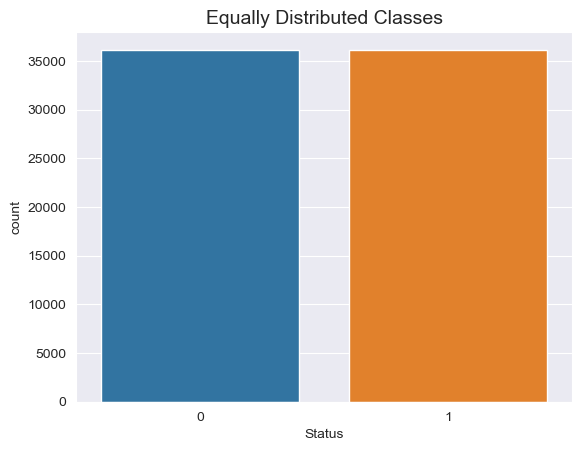

In [77]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Status'].value_counts()/len(new_df))

sns.countplot(new_df, x='Status')
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

# Model Building

In [78]:
#new x_train, y_train
x_train = new_df.drop('Status', axis=1)
y_train = new_df['Status']

In [79]:
list_col = list(x_train.columns)

In [80]:
dir_col = {}
for i in range(len(list_col)):
    dir_col[str(i)] = list_col[i]

In [81]:
dir_col

{'0': 'ID',
 '1': 'loan_limit',
 '2': 'Gender',
 '3': 'approv_in_adv',
 '4': 'loan_type',
 '5': 'loan_purpose',
 '6': 'Credit_Worthiness',
 '7': 'open_credit',
 '8': 'business_or_commercial',
 '9': 'loan_amount',
 '10': 'rate_of_interest',
 '11': 'Interest_rate_spread',
 '12': 'Upfront_charges',
 '13': 'term',
 '14': 'Neg_ammortization',
 '15': 'interest_only',
 '16': 'lump_sum_payment',
 '17': 'property_value',
 '18': 'construction_type',
 '19': 'occupancy_type',
 '20': 'Secured_by',
 '21': 'total_units',
 '22': 'income',
 '23': 'credit_type',
 '24': 'Credit_Score',
 '25': 'co-applicant_credit_type',
 '26': 'age',
 '27': 'submission_of_application',
 '28': 'LTV',
 '29': 'Region',
 '30': 'Security_Type',
 '31': 'dtir1'}

In [82]:
x_test.rename(columns=dir_col,inplace=True)

KNN

In [83]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)

In [84]:
fin=accuracy_score(y_test, y_pred)
fin

0.7546770208259795

In [85]:
print(knn.score(x_train,y_train))

0.7713688812640084


In [86]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[27794     0]
 [ 9035     0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     27794
           1       0.00      0.00      0.00      9035

    accuracy                           0.75     36829
   macro avg       0.38      0.50      0.43     36829
weighted avg       0.57      0.75      0.65     36829



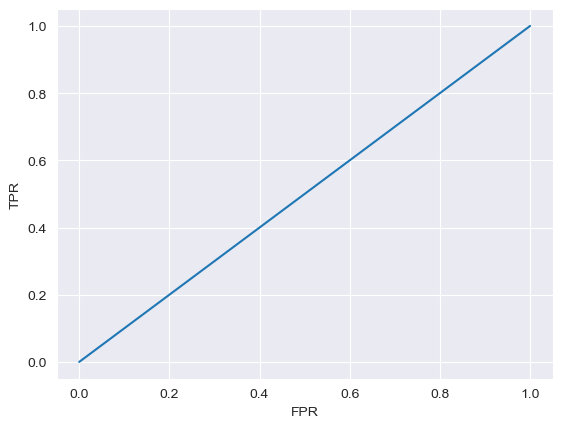

In [87]:
y_pred_proba=knn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [88]:
roc_auc_score(y_test,y_pred_proba)

0.5

In [89]:
f1_score(y_test, y_pred)

0.0

Roc_auc_score equal to 0.5 indicates that random guessing, as we see that accuracy and f1_score in test set is very low, this model is not suitable for this problem.

# Logistic Regression and CART

In [90]:
lr=LogisticRegression()
dt=DecisionTreeClassifier(max_depth=10)
classifiers=[('Logistic Regression',lr),('CART',dt)]

In [91]:
for clf_name, clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(f'{clf_name} for test set: {accuracy_score(y_test,y_pred)}')
    print(f'Train Accuracy: {clf.score(x_train, y_train)}')

Logistic Regression for test set: 0.5550517255423715
Train Accuracy: 0.5627576856028114
CART for test set: 0.7546770208259795
Train Accuracy: 1.0


This result indicate that Logistic Regression have both low bias and low variance since accuracy in test set and train set is still low(under 0.6).
Decision Tree Classifiers goves better result, but has the problem of overfitting.

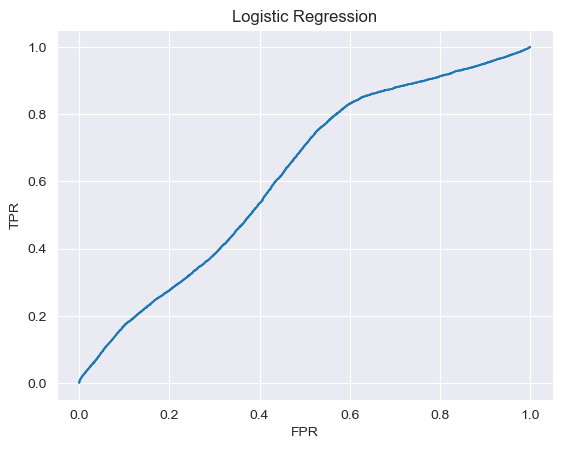

AUC SCORE:0.6153968207635916
F1 Score: 0.42983890609234193


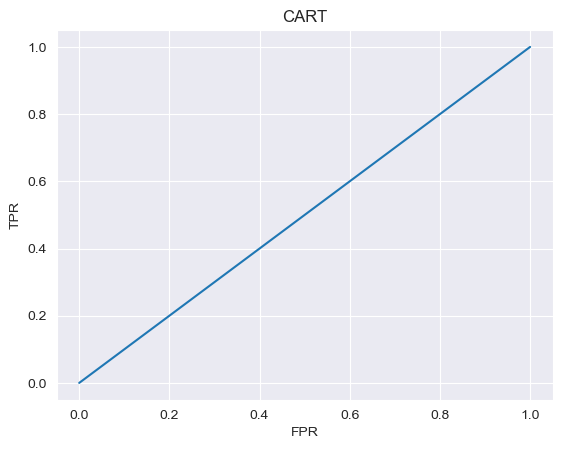

AUC SCORE:0.5
F1 Score: 0.0


In [92]:
for clf_name,clf in classifiers:
    y_pred = clf.predict(x_test)
    y_pred_proba=clf.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
    plt.plot(fpr,tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(clf_name)
    plt.show()
    print(f'AUC SCORE:{roc_auc_score(y_test,y_pred_proba)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')

# Voting classifier

In [95]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=classifiers,voting='soft')
vc.fit(x_train,y_train)
y_pred=vc.predict(x_test)
print(f'Accuracy in test set: {accuracy_score(y_test,y_pred)}')
print(f'Train Accuracy:{vc.score(x_train,y_train)}')

Accuracy in test set: 0.7546770208259795
Train Accuracy:1.0


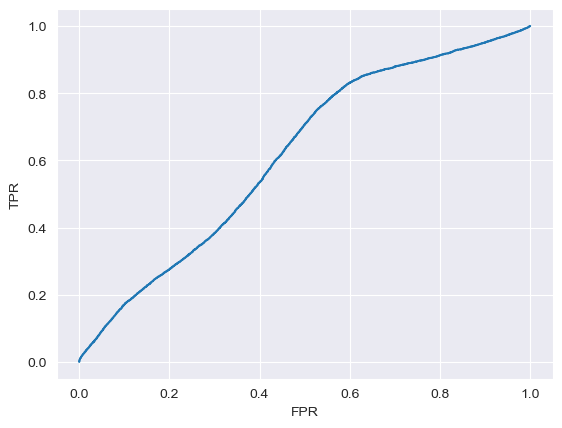

In [96]:
from sklearn.metrics import roc_curve
y_pred_proba=vc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [97]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.6153968207635916

In [99]:
f1_score(y_test, y_pred)

0.0

# Bagging

In [101]:
from sklearn.ensemble import BaggingClassifier
dt=DecisionTreeClassifier(max_depth=10,min_samples_leaf=16)
bc=BaggingClassifier(estimator=dt,n_estimators=300,n_jobs=-1)
bc.fit(x_train,y_train)
y_pred=bc.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7546770208259795


In [102]:
print(bc.score(x_train,y_train))

1.0


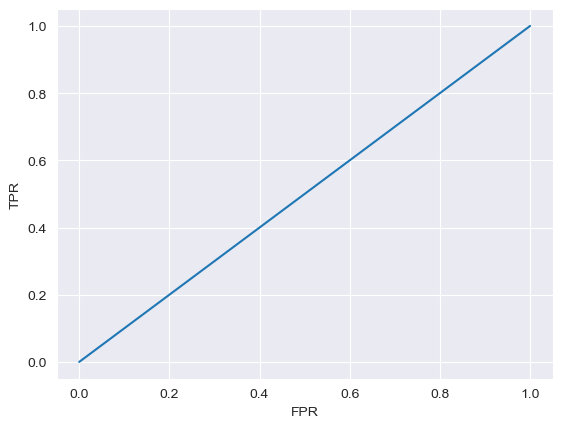

In [104]:
y_pred_proba=bc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [105]:
roc_auc_score(y_test,y_pred_proba)

0.5

In [106]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[27794     0]
 [ 9035     0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     27794
           1       0.00      0.00      0.00      9035

    accuracy                           0.75     36829
   macro avg       0.38      0.50      0.43     36829
weighted avg       0.57      0.75      0.65     36829



In [107]:
f1_score(y_pred,y_test)

0.0

We can explain f1score=0 that because the test set is very imbalanced, the number of Non-Defaulters is always greater than the number of Defaulters, the classifiers will often predict more Non-Defaulter results, even if true or false, leading to the predicted amount of Defaulter being very small, leading to one of the two precision or recall indexes being close to 0 and causing the f1 score to be approximately 0 as well.

# Random Forest

In [108]:
rf=RandomForestClassifier(n_estimators=20,n_jobs=-1,min_samples_leaf=0.01)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7546770208259795


In [109]:
print(rf.score(x_train,y_train))

0.9997371260964609


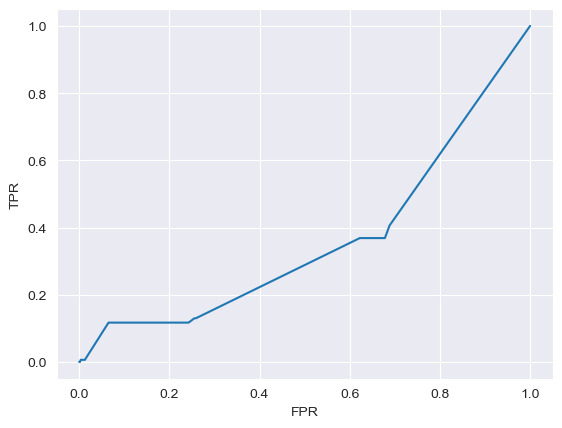

In [110]:
from sklearn.metrics import roc_curve
y_pred_proba=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [111]:
roc_auc_score(y_test,y_pred_proba)

0.3603465634730081

In [112]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[27794     0]
 [ 9035     0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     27794
           1       0.00      0.00      0.00      9035

    accuracy                           0.75     36829
   macro avg       0.38      0.50      0.43     36829
weighted avg       0.57      0.75      0.65     36829



# AdaBoostClassifier

In [114]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(estimator=dt,n_estimators=1)
ad.fit(x_train,y_train)
y_pred=ad.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7546770208259795


In [115]:
print(ad.score(x_train,y_train))

1.0


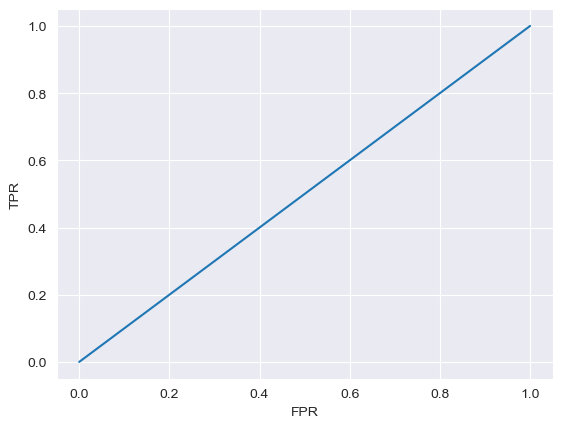

In [116]:
from sklearn.metrics import roc_curve
y_pred_proba=ad.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [117]:
roc_auc_score(y_test,y_pred_proba)

0.5

In [118]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[27794     0]
 [ 9035     0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     27794
           1       0.00      0.00      0.00      9035

    accuracy                           0.75     36829
   macro avg       0.38      0.50      0.43     36829
weighted avg       0.57      0.75      0.65     36829



# GradientBoosting

In [119]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=17,max_depth=12)
gbc.fit(x_train, y_train)
y_pred=gbc.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7546770208259795


In [120]:
print(gbc.score(x_train,y_train))

1.0


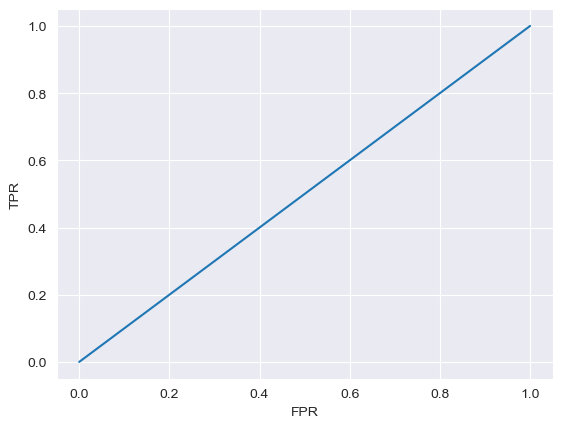

In [121]:
y_pred_proba=gbc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [122]:
roc_auc_score(y_test,y_pred_proba)

0.5

In [123]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[27794     0]
 [ 9035     0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     27794
           1       0.00      0.00      0.00      9035

    accuracy                           0.75     36829
   macro avg       0.38      0.50      0.43     36829
weighted avg       0.57      0.75      0.65     36829



# Deep Learning

In [124]:
from tensorflow.keras.optimizers import Adam

In [125]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 32))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 50 , validation_split=0.2)

Epoch 1/50
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6676 - loss: 0.6287 - val_accuracy: 0.9866 - val_loss: 0.0869
Epoch 2/50
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 2s 961us/step - accuracy: 0.9559 - loss: 0.1251 - val_accuracy: 0.9956 - val_loss: 0.0222
Epoch 3/50
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9655 - loss: 0.0689 - val_accuracy: 0.9977 - val_loss: 0.0181
Epoch 4/50
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9668 - loss: 0.0568 - val_accuracy: 0.9981 - val_loss: 0.0197
Epoch 5/50
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9687 - loss: 0.0509 - val_accuracy: 0.9989 - val_loss: 0.0196
Epoch 6/50
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9683 - loss: 0.0489 - val_accuracy: 0.9990 - val_loss: 0.0224
Epoch 7/50
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9661 - loss: 0.0496 - val_accuracy: 0.9992 - val_loss: 0.0255
Epoch 8/50
1807/1807 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9699 - loss: 0.0447 

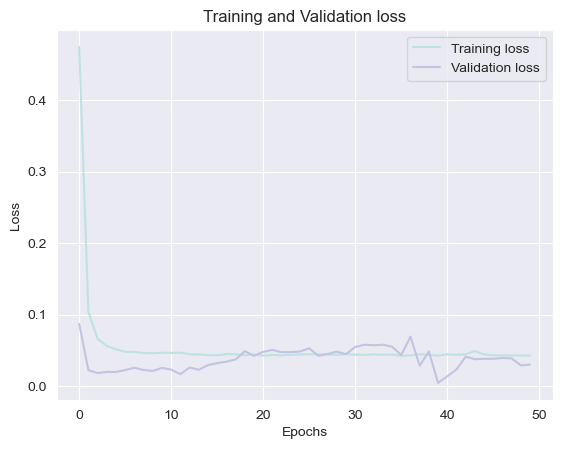

In [126]:
#Plotting training and validation loss over epochs

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

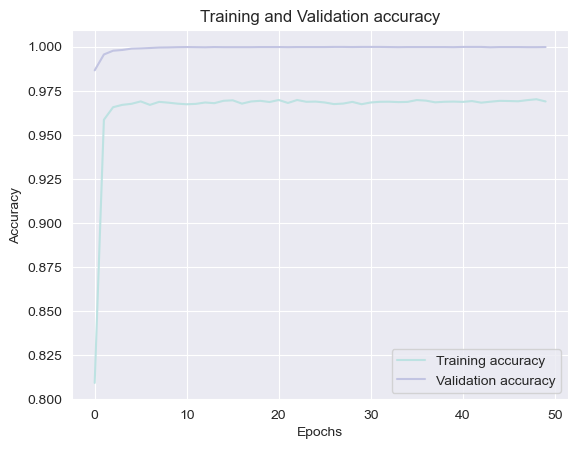

In [127]:
#Plotting training and validation accuracy over epochs

history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [128]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

1151/1151 ━━━━━━━━━━━━━━━━━━━━ 1s 527us/step


<Axes: >

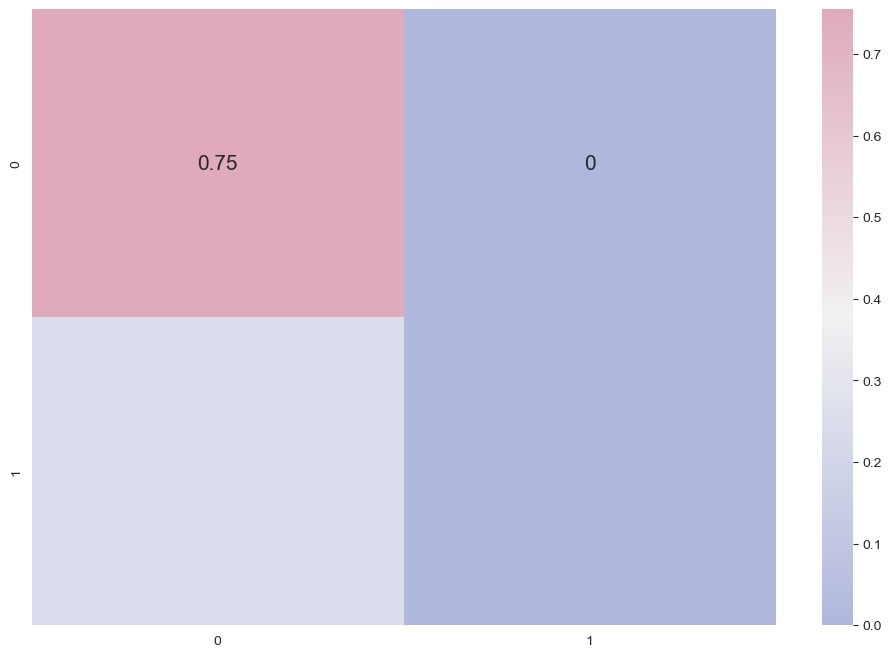

In [129]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     27794
           1       1.00      0.00      0.00      9035

    accuracy                           0.75     36829
   macro avg       0.88      0.50      0.43     36829
weighted avg       0.81      0.75      0.65     36829



In [131]:
print(accuracy_score(y_test,y_pred))

0.7548942409514241
